## Single layer Perceptron

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


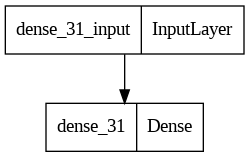

In [42]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming input_shape is defined
input_shape = (3,)  # Example input shape, change according to your data

# Define the model
model = Sequential()

# Add a single-layer perceptron
model.add(Dense(units=1, input_shape=input_shape, activation='linear'))

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

# Print model summary
model.summary()
plot_model(model, to_file='single_perceptron_graph.png')


## Multilayer Perceptron

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 20)                220       
                                                                 
 dense_28 (Dense)            (None, 10)                210       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 551 (2.15 KB)
Trainable params: 551 (2.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


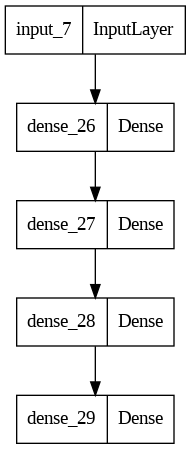

In [39]:

#The model has 10 inputs, 3 hidden layers with 10, 20, and 10 neurons,
#and an output layer with 1 output.
#Rectified linear activation functions are used in each hidden layer and
# a sigmoid activation function is used in the output layer, for binary classification.

from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [20]:
from keras.models import Model

In [21]:
from keras.layers import *

In [22]:
x = Input(shape=(3,))

In [23]:
hidden1 = Dense(128,activation='relu')(x)
hidden2 = Dense(64,activation='relu')(hidden1)

output1 = Dense(1,activation='linear')(hidden2)
output2 = Dense(1,activation='sigmoid')(hidden2)

In [24]:
model = Model(inputs = x ,outputs = [output1,output2])

In [25]:
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_15 (Dense)            (None, 128)                  512       ['input_4[0][0]']             
                                                                                                  
 dense_16 (Dense)            (None, 64)                   8256      ['dense_15[0][0]']            
                                                                                                  
 dense_17 (Dense)            (None, 1)                    65        ['dense_16[0][0]']            
                                                                                            

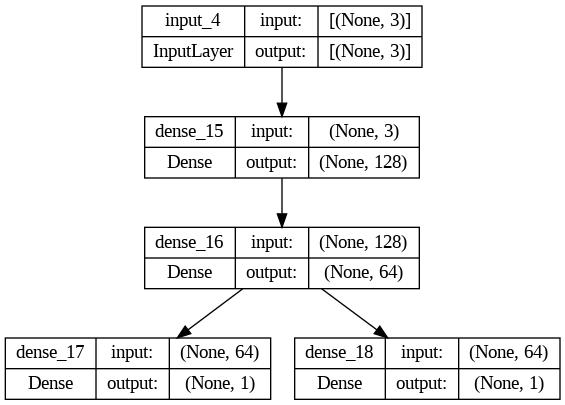

In [26]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

# Demo 2

In [27]:
from keras.layers import *
from keras.models import Model

In [28]:
# define two sets of inputs
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [29]:
# the first branch operates on the first input
x = Dense(8, activation="relu")(inputA)
x1 = Dense(4, activation="relu")(x)


In [30]:
# the second branch opreates on the second input
y = Dense(64, activation="relu")(inputB)
y1 = Dense(32, activation="relu")(y)
y2 = Dense(4, activation="relu")(y1)

In [31]:
# combine the output of the two branches
combined = concatenate([x1, y2])

In [32]:
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z1 = Dense(1, activation="linear")(z)

Above setup allows for further processing of the combined outputs before making the final regression prediction.







In [33]:
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[inputA, inputB], outputs=z1)

In [37]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 32)]                 0         []                            
                                                                                                  
 dense_21 (Dense)            (None, 64)                   8256      ['input_6[0][0]']             
                                                                                                  
 dense_19 (Dense)            (None, 8)                    264       ['input_5[0][0]']             
                                                                                            

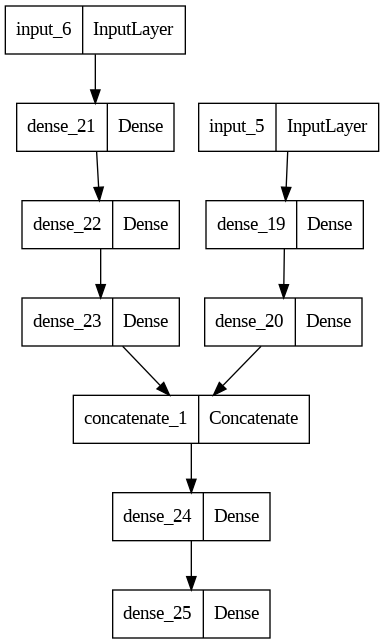

In [38]:

plot_model(model)

# Demo 3

https://colab.research.google.com/drive/1uCHf6hoLR1a-46RznVjqnhVZNechF0fz#scrollTo=IpAWQiRaUgJr&line=1&uniqifier=1

https://youtu.be/OvQQP1QVru8?si=b3JU36EMKLx-3X18


## Convolutional Neural Network
Image Classification

The model receives black and white 64×64 images as input, then has a sequence of two convolutional and pooling layers as feature extractors, followed by a fully connected layer to interpret the features and an output layer with a sigmoid activation for two-class predictions.

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 16)        8208      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2704)              0   

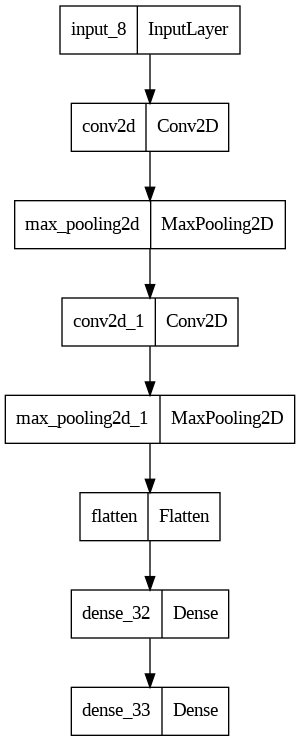

In [45]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D



# Define the input layer
visible = Input(shape=(64, 64, 1))

# First convolutional layer with 32 filters and a kernel size of 4x4
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)

# Max pooling layer
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

# Second convolutional layer with 16 filters and a kernel size of 4x4
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)

# Max pooling layer
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

# Flatten layer to convert 2D feature maps to a vector
flat = Flatten()(pool2)

# Fully connected hidden layer with 10 neurons
hidden1 = Dense(10, activation='relu')(flat)

# Output layer with a single neuron for binary classification
output = Dense(1, activation='sigmoid')(hidden1)

# Create the model
model = Model(inputs=visible, outputs=output)

# Summarize the model
print(model.summary())

# Plot the graph and save it to a file
plot_model(model, to_file='convolutional_neural_network.png')


## Recurrent Neural Network
 define a long short-term memory recurrent neural network for sequence classification.

The model expects 100 time steps of one feature as input. The model has a single LSTM hidden layer to extract features from the sequence, followed by a fully connected layer to interpret the LSTM output, followed by an output layer for making binary predictions.



Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


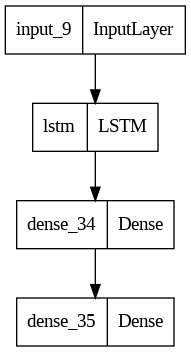

In [47]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.layers import LSTM

# Define the input layer
visible = Input(shape=(100, 1))

# LSTM layer with 10 units
hidden1 = LSTM(10)(visible)

# Dense layer with 10 units and ReLU activation
hidden2 = Dense(10, activation='relu')(hidden1)

# Output layer with a single unit and sigmoid activation for binary classification
output = Dense(1, activation='sigmoid')(hidden2)

# Create the model
model = Model(inputs=visible, outputs=output)

# Summarize the model
print(model.summary())

# Plot the graph and save it to a file
plot_model(model, to_file='recurrent_neural_network.png')


## Shared Input Layer
Define multiple convolutional layers with differently sized kernels to interpret an image input.

The model takes black and white images with the size 64×64 pixels. There are two CNN feature extraction submodels that share this input; the first has a kernel size of 4 and the second a kernel size of 8. The outputs from these feature extraction submodels are flattened into vectors and concatenated into one long vector and passed on to a fully connected layer for interpretation before a final output layer makes a binary classification.

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 61, 61, 32)           544       ['input_10[0][0]']            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 57, 57, 16)           1040      ['input_10[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)           0         ['conv2d_2[0][0]']            
 g2D)                                                                                       

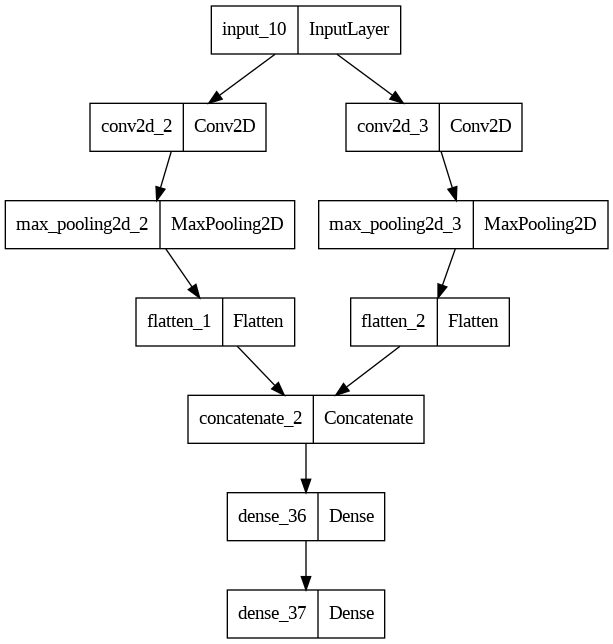

In [49]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define the input layer
visible = Input(shape=(64, 64, 1))

# First feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

# Second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

# Merge feature extractors
merge = concatenate([flat1, flat2])

# Interpretation layer
hidden1 = Dense(10, activation='relu')(merge)

# Prediction output
output = Dense(1, activation='sigmoid')(hidden1)

# Create the model
model = Model(inputs=visible, outputs=output)

# Summarize the model
print(model.summary())

# Plot the graph and save it to a file
plot_model(model, to_file='shared_input_layer.png')


more https://machinelearningmastery.com/keras-functional-api-deep-learning/